# Data Preprocessing

## Similarity and Dissimilarity

### 常见Metrics
- Similarity:
  - Jaccard / cosine similarity: For sparse data (e.g., documents) 
  - Pearson’s correlation: For linear relationships
  - Mutual information: For none-linear relationship
- Dissimilarity:
  - Hamming distance: For binary vector
  - Euclidean distance: For dense data (e.g., time series, multi-dimensional points)

### 各种相似度计算


In [43]:
import numpy as np
from scipy.spatial import distance
from scipy.stats import pearsonr # type: ignore
from sklearn.metrics import mutual_info_score # type: ignore

def sim_dissim_numpy(a,b):
    array1 = np.asarray(a, dtype=bool)
    array2 = np.asarray(b, dtype=bool)
    intersection = np.sum(np.logical_and(array1, array2))
    union = np.sum(np.logical_or(array1, array2))
    jaccard_similarity =  intersection / union if union != 0 else 0
    cosine_similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    pearson_correlation = np.corrcoef(a, b)[0, 1]
    mutual_information = mutual_info_score(a, b)
    hamming_distance = np.sum(a != b)
    euclidean_distance = np.linalg.norm(a - b)
    manhattan_distance = np.sum(np.abs(a - b))
    supremum_distance = np.max(np.abs(a - b))
    print("Jaccard Similarity:", jaccard_similarity)
    print("Cosine Similarity:", cosine_similarity)
    print("Pearson's Correlation:", pearson_correlation)
    print("Mutual Information:", mutual_information)
    print("Hamming Distance:", hamming_distance)
    print("Euclidean Distance:", euclidean_distance)
    print("Manhattan Distance:", manhattan_distance)
    print("Supremum (Chebyshev) Distance:", supremum_distance)
def sim_dissim_scipy(a,b):
    array1 = np.asarray(a, dtype=bool)
    array2 = np.asarray(b, dtype=bool)
    jaccard_similarity =  1 - distance.jaccard(array1, array2)
    cosine_similarity = 1 - distance.cosine(a, b)
    pearson_correlation, _ = pearsonr(a, b)
    mutual_information = mutual_info_score(a, b)
    hamming_distance = distance.hamming(a, b) * len(a)
    euclidean_distance = distance.euclidean(a, b)
    manhattan_distance = distance.cityblock(a, b)
    supremum_distance = distance.chebyshev(a, b)
    print("Jaccard Similarity:", jaccard_similarity)
    print("Cosine Similarity:", cosine_similarity)
    print("Pearson's Correlation:", pearson_correlation)
    print("Mutual Information:", mutual_information)
    print("Hamming Distance:", hamming_distance)
    print("Euclidean Distance:", euclidean_distance)
    print("Manhattan Distance:", manhattan_distance)
    print("Supremum (Chebyshev) Distance:", supremum_distance)


In [44]:
## test
a = [1, 2, 3, 4, 5]
b = [5, 4, 3, 2, 1]
a = np.array(a)
b = np.array(b)
sim_dissim_numpy(a,b)
sim_dissim_scipy(a,b)

Jaccard Similarity: 1.0
Cosine Similarity: 0.6363636363636364
Pearson's Correlation: -0.9999999999999999
Mutual Information: 1.6094379124341005
Hamming Distance: 4
Euclidean Distance: 6.324555320336759
Manhattan Distance: 12
Supremum (Chebyshev) Distance: 4
Jaccard Similarity: 1.0
Cosine Similarity: 0.6363636363636364
Pearson's Correlation: -1.0
Mutual Information: 1.6094379124341005
Hamming Distance: 4.0
Euclidean Distance: 6.324555320336759
Manhattan Distance: 12
Supremum (Chebyshev) Distance: 4


### 相似度计算分数转换

- Cosine Similarity => Euclidean Distance

    假设有两个向量 $ \mathbf{A} $ 和 $ \mathbf{B} $，它们的余弦相似度为 $ \text{cos\_sim}(\mathbf{A}, \mathbf{B}) $。余弦相似度和欧几里得距离之间的关系如下：
    $$
    \text{Euclidean Distance} = \sqrt{2 \cdot (1 - \text{cos\_sim}(\mathbf{A}, \mathbf{B}))}
    $$

In [60]:
import numpy as np
def cosine_similarity_to_euclidean_distance(cosine_similarity, vector_length1=1, vector_length2=1):
    if vector_length1==1 and vector_length2==1:
        euclidean_distance = np.sqrt(2 * (1 - cosine_similarity))
    else:
        euclidean_distance = np.sqrt(vector_length1**2 + vector_length2**2 - 2 * vector_length1 * vector_length2 * cosine_similarity)
    return euclidean_distance

def euclidean_distance_to_cosine_similarity(euclidean_distance, vector_length1=1, vector_length2=1):
    if vector_length1==1 and vector_length2==1:
        cosine_similarity = 1 - (euclidean_distance**2 / 2)
    else:
        cosine_similarity = (vector_length1**2 + vector_length2**2 - euclidean_distance**2) / (2 * vector_length1 * vector_length2)
    return cosine_similarity

In [61]:
cos_sim = 0.8
vector_length1 = 1
vector_length2 = 1

# 计算欧几里得距离
euclidean_dist = cosine_similarity_to_euclidean_distance(cos_sim, vector_length1, vector_length2)
print("欧几里得距离:", euclidean_dist)

# 将欧几里得距离转换回余弦相似度
cosine_sim_converted = euclidean_distance_to_cosine_similarity(euclidean_dist, vector_length1, vector_length2)
print("转换后的余弦相似度:", cosine_sim_converted)

欧几里得距离: 0.6324555320336758
转换后的余弦相似度: 0.8


## Data Normalization

### 基本介绍
- 常见归一化方式
  - Z-score normalization: Mean=0, Standard deviation=1
  - Min-max normalization: Rescaled into any given interval

### 代码实现

In [66]:
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

def normalizaition(array, minmaxRange = (0,1)):
    # Z-score normalization
    zscore_normalized_array = zscore(array)

    # Min-max normalization
    scaler = MinMaxScaler(feature_range=minmaxRange) # 默认缩放至[0,1]
    minmax_normalized_array = scaler.fit_transform(array.reshape(-1, 1)).flatten()

    print("Original Array:", array)
    print("Z-score Normalized Array:", zscore_normalized_array)
    print("Min-Max Normalized Array:", minmax_normalized_array)

In [67]:
array = [100,200,400,800,1500,3000]
array= np.array(array)
minmaxRange = (0,1)
normalizaition(array, minmaxRange=minmaxRange)

Original Array: [ 100  200  400  800 1500 3000]
Z-score Normalized Array: [-0.89259247 -0.79341553 -0.59506164 -0.19835388  0.4958847   1.98353881]
Min-Max Normalized Array: [0.         0.03448276 0.10344828 0.24137931 0.48275862 1.        ]


# Classification Algorithm

## Decision Tree

### 基本知识
+ Goals:
  + To determine the best attribute for splitting the data
  + To stop splitting when further division doesn't improve the model
+ Methods
  + Splitting criterion:
    + Gini Index
    + Entropy
    + Classification Error
  + Stop splitting criterion:
    + Only one class in a node 
    + No available attributes 
    + No samples in a node

### Gini Index
#### 基本定义
- 用途：Measure Impurity of a Single node
- 数学定义：$ Gini = 1 - \sum_{i=1}^{n} p_i^2 $
  - $n$ is the total number of classes,
  - $p_i$ is the proportion of samples belonging to class $i$ in the node.

#### 案例一：Identify the best attribute condition

In [74]:
import numpy as np
## 第一步：Calculate the Gini index of a root node.
Label = np.array([5,5])
G_ori = 1 - np.sum((Label/np.sum(Label))**2)
print("Gini index of root node: ", G_ori)

Gini index of root node:  0.5


In [92]:
## 第二步：确定Which attribute would be chosen as the first splitting attribute?
def get_gini_spilt(M):
    row_sums = M.sum(axis=1, keepdims=True)
    normalized_M = M / row_sums
    squared_M = normalized_M ** 2
    gini_each = 1 - squared_M.sum(axis=1)
    ratio_each = M.sum(axis=1)/np.sum(M.sum(axis=1))
    gini_split = np.sum(gini_each * ratio_each)
    return gini_split

A = np.array([[4,2],[1,3]])
G_A = get_gini_spilt(A)
B = np.array([[3,3],[2,2]])
G_B = get_gini_spilt(B)
print("gini_spilt of A: ", G_A)
print("gini_spilt of B: ", G_B)

gini_spilt of A:  0.4166666666666667
gini_spilt of B:  0.5


In [94]:
## 第三步：Calculate the information gain.
GAIN_A = G_ori - G_A
GAIN_B = G_ori - G_B
print("GAIN_A:", GAIN_A)
print("GAIN_B:", GAIN_B)

GAIN_A: 0.08333333333333331
GAIN_B: 0.0


#### 案例二：推导决策树
- 根据混淆矩阵评估决策树效果

In [95]:
import numpy as np
confusion_matrix = np.array([[50, 10],
                             [5, 35]])

# 从混淆矩阵中获取TP, TN, FP, FN
TP = confusion_matrix[0, 0]  # 真阳性
TN = confusion_matrix[1, 1]  # 真阴性
FP = confusion_matrix[1, 0]  # 假阳性
FN = confusion_matrix[0, 1]  # 假阴性

accuracy = (TP + TN) / np.sum(confusion_matrix)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_measure = 2 * (precision * recall) / (precision + recall)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f_measure:.2f}")

Accuracy: 0.85
Precision: 0.91
Recall: 0.83
F-measure: 0.87


# Clustering Algorithm

## K-means
### 基本知识
- 算法迭代过程
  1. **初始化**：随机选择 k 个观察值作为初始的聚类中心。
  2. **分配步骤**：将每个观察值分配给最近的聚类中心，形成 k 个簇。
  3. **更新步骤**：对每个簇，计算所有点的均值并将其设置为新的聚类中心。
  4. **重复**：重复分配和更新步骤，直到聚类中心不再显著变化或达到预定的迭代次数，算法结束。

### 案例一：
#### 迭代过程可视化

In [ ]:
import numpy as np
import pandas as pd

# K-means聚类的逐步实现函数
def kmeans_1d_until_convergence(points, initial_centroids):
    centroids = initial_centroids.copy()
    steps_data = []
    step = 0
    converged = False

    while not converged:
        step += 1
        
        # 第一步：将点分配到最近的质心
        distances = np.abs(points[:, np.newaxis] - centroids)
        cluster_assignments = np.argmin(distances, axis=1)
        
        # 第二步：根据分配的点的平均值更新质心
        new_centroids = []
        for k in range(len(centroids)):
            assigned_points = points[cluster_assignments == k]
            if len(assigned_points) > 0:
                new_centroids.append(np.mean(assigned_points))
            else:
                new_centroids.append(centroids[k])  # 如果没有分配的点，质心保持不变
        new_centroids = np.array(new_centroids)
        
        # 记录当前步的数据
        step_data = {
            "Step": step,
            "Centroids": new_centroids,
            "Cluster Assignments": [points[cluster_assignments == i].tolist() for i in range(len(centroids))]
        }
        steps_data.append(step_data)
        
        # 检查是否收敛（如果质心不再变化）
        if np.array_equal(centroids, new_centroids):
            converged = True
        else:
            centroids = new_centroids  # 更新质心
    
    # 将步骤数据转换为DataFrame便于查看
    steps_df = pd.DataFrame({
        "Step": [d["Step"] for d in steps_data],
        "Cluster Assignments": [d["Cluster Assignments"] for d in steps_data],
        "Centroids": [d["Centroids"] for d in steps_data],
    })
    
    return steps_df

# 样本数据点和初始质心
points = np.array([100, 200, 400, 800, 1100, 1600])  # 输入的一维数据点
initial_centroids = np.array([1100, 1600])  # 初始质心

# 运行函数并展示结果
steps_df = kmeans_1d_until_convergence(points, initial_centroids)
print(steps_df)

   Step                   Cluster Assignments        Centroids
0     1  [[100, 200, 400, 800, 1100], [1600]]  [520.0, 1600.0]
1     2  [[100, 200, 400, 800], [1100, 1600]]  [375.0, 1350.0]
2     3  [[100, 200, 400, 800], [1100, 1600]]  [375.0, 1350.0]
412500
1267500


#### 计算SSE和SSB值
SSE Formula:
The Sum of Squared Error within cluster (SSE) measures the total variance within each cluster:
$$
\text{SSE} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

SSB Formula:
The Sum of Squares Between clusters (SSB) measures the variance between the clusters and the overall mean:
$$
\text{SSB} = \sum_{i=1}^{k} |C_i| \cdot \| \mu_i - \mu \|^2
$$

Explanation:
- $ k $: The number of clusters.
- $ C_i $: The set of points in cluster $ i $.
- $ x $: Individual data points within a cluster.
- $ \mu_i $: The centroid (mean) of cluster $ i $.
- $ \mu $: The overall mean of all data points.
- $ |C_i| $: The number of points in cluster $ i $.

These formulas calculate the within-cluster error (SSE) and between-cluster variation (SSB) in clustering analysis.

In [109]:
def calculate_sse_ssb(points, centroids, cluster_assignments):
    # 计算整体均值（所有点的均值）
    overall_mean = np.mean(points)
    
    # 计算 SSE
    sse = 0
    for k in range(len(centroids)):
        assigned_points = points[cluster_assignments == k]
        sse += np.sum((assigned_points - centroids[k]) ** 2)
    
    # 计算 SSB
    ssb = 0
    for k in range(len(centroids)):
        assigned_points = points[cluster_assignments == k]
        cluster_size = len(assigned_points)
        ssb += cluster_size * (centroids[k] - overall_mean) ** 2
    
    return sse, ssb

# 获取最终的质心和分配结果
final_centroids = steps_df["Centroids"].iloc[-1]
cluster_assignments = np.argmin(np.abs(points[:, np.newaxis] - final_centroids), axis=1)

# 计算 SSE 和 SSB
sse, ssb = calculate_sse_ssb(points, final_centroids, cluster_assignments)
print("Sum of Squared Error (SSE):", sse)
print("Sum of Squares Between clusters (SSB):", ssb)
# SSE = (100-375)**2 +(200-375)**2 +(400-375)**2 + (800-375)**2 +(1100-1350)**2 +(1600-1350)**2
# SSB = 4 * (700-375)**2 + 2 * (700-1350)**2
# print(SSE) # SSE: 412500
# print(SSB) # SSB: 1267500

Sum of Squared Error (SSE): 412500.0
Sum of Squares Between clusters (SSB): 1267500.0


#### 计算 Silhouette Coefficient
Silhouette Coefficient 是衡量一个点的聚类质量的指标，其取值范围为 -1 到 1。Silhouette Coefficient 的定义公式如下：
$$
s = \frac{b - a}{\max(a, b)}
$$

其中：
- $ a $：该点到其所属簇中其他点的平均距离，即点到同簇内部的紧密度。
- $ b $：该点到最近的另一个簇的所有点的平均距离，即点到最近其他簇的分离度。

Silhouette Coefficient 的解释如下：
- **正值**：表明该点更接近其所属的簇，而远离其他簇，意味着聚类效果较好。
- **零值**：表示该点位于两个簇的边界上，聚类效果不显著。
- **负值**：表明该点可能更适合属于其他簇，聚类效果较差。

In [118]:
def silhouette_coefficient(point, points, cluster_assignments, centroids):
    # 找到该点的簇
    point_cluster = cluster_assignments[np.where(points == point)[0][0]]
    
    # 计算 a：该点到同簇其他点的平均距离
    same_cluster_points = points[cluster_assignments == point_cluster]
    if len(same_cluster_points) > 1:
        # 排除该点自身
        a = np.mean(np.abs(same_cluster_points[same_cluster_points != point] - point))
    else:
        a = 0  # 若簇中仅有该点，则 a 为 0
    
    # 计算 b：该点到最近的其他簇的平均距离
    b = np.min([np.mean(np.abs(points[cluster_assignments == k] - point)) for k in range(len(centroids)) if k != point_cluster])
    
    # 计算 Silhouette Coefficient
    silhouette = (b - a) / max(a, b)
    return silhouette


point = 100
silhouette_point = silhouette_coefficient(point, points, cluster_assignments, final_centroids)
print("Silhouette Coefficient for point:", silhouette_point)
# a = ((200-100)+ (400-100)+(800-100))/3
# b = ((1600 - 100) + (1100 - 100))/2
# s = 1-a/b
# print(s) # 0.7066666666666667

Silhouette Coefficient for point: 0.7066666666666666


### 案例二：
A distance matrix is given in the following Table. Points p1 and p2 belong to cluster 1, and points p3 and p4 belong to cluster 2.

#### 计算SSE
$ \text{SSE} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2 $

$ X1-m=X1-(X1+X2)/2=(X1-X2)/2=d(p1,p2)/2 $

$ \text{SSE} = (d(p1,p2)/2)^2 + (d(p1,p2)/2)^2 + (d(p3,p4)/2)^2 + (d(p3,p4)/2)^2   $

#### 计算 Silhouette Coefficient
$ s = \frac{b - a}{\max(a, b)} $
- $ a $：簇内平均距离，
- $ b $：最近簇的所有点的平均距离

### 案例三：
Compute the entropy and purity for each cluster and the overall clustering result, according to the confusion.

In [121]:
import numpy as np
from scipy.stats import entropy

def calculate_entropy_purity(confusion_matrix):
    # 转换成NumPy数组
    confusion_matrix = np.array(confusion_matrix)
    
    # 总的样本数
    total_samples = np.sum(confusion_matrix)
    
    # 初始化熵和纯度
    cluster_entropies = []
    total_entropy = []
    cluster_purities = []
    total_purity = []
    
    # 计算每个Cluster的熵和纯度
    for i, cluster in enumerate(confusion_matrix):
        # 每个cluster的样本数
        cluster_total = np.sum(cluster)
        
        # 计算熵
        cluster_entropy = entropy(cluster, base=2) if cluster_total > 0 else 0
        cluster_entropies.append(cluster_entropy)
        total_entropy.append((cluster_total / total_samples) * cluster_entropy)
        
        # 计算纯度
        cluster_purity = np.max(cluster) / cluster_total if cluster_total > 0 else 0
        cluster_purities.append(cluster_purity)
        total_purity.append((cluster_total / total_samples) * cluster_purity)
    
    # 总熵和总纯度
    total_entropy = sum(total_entropy)
    total_purity = sum(total_purity)
    
    return {
        "cluster_entropies": cluster_entropies,
        "total_entropy": total_entropy,
        "cluster_purities": cluster_purities,
        "total_purity": total_purity
    }

# 示例混淆矩阵
confusion_matrix = [
    [1,1,0,11,4,676],
    [27,89,333,827,253,33],
    [326,465,8,105,16,29]
]

# 计算熵和纯度
results = calculate_entropy_purity(confusion_matrix)
print("每个Cluster的熵:", [f"{entropy:.4f}" for entropy in results["cluster_entropies"]])
print("总熵:", f"{results['total_entropy']:.4f}")
print("每个Cluster的纯度:", [f"{purity:.4f}" for purity in results["cluster_purities"]])
print("总纯度:", f"{results['total_purity']:.4f}")

每个Cluster的熵: ['0.2000', '1.8407', '1.6964']
总熵: 1.4431
每个Cluster的纯度: ['0.9755', '0.5294', '0.4900']
总纯度: 0.6142


## Hierachical Clustering

### Agglomerative Clustering（凝聚层次聚类）
Agglomerative Clustering 是一种层次聚类算法，从每个数据点作为一个独立的簇开始，通过不断地合并最近的簇，逐步形成层次化的聚类结构，直到满足停止条件。以下是算法的步骤：

1. **初始化**：将每个数据点视为一个单独的簇，开始时有 $ n $ 个簇，$ n $ 是数据点的数量。

2. **计算距离矩阵**：计算每对簇之间的距离，通常使用欧氏距离，但可以选择其他距离度量（如曼哈顿距离、余弦相似度等）。

3. **合并最近的簇**：找到距离最小的两簇，将它们合并为一个新的簇。然后更新距离矩阵，将新簇与其他簇之间的距离重新计算。
   
   - **距离更新方法**：
      - **单连接（Single Linkage）**：新簇与其他簇之间的距离是两个簇间最近点的距离。
      - **全连接（Complete Linkage）**：新簇与其他簇之间的距离是两个簇间最远点的距离。
      - **平均连接（Average Linkage）**：新簇与其他簇之间的距离是两个簇间所有点对距离的平均值。
      - **质心连接（Centroid Linkage）**：新簇的质心与其他簇质心之间的距离。
   
4. **更新簇数量**：将簇的数量减1（因为合并了两个簇），然后返回步骤3继续合并。

5. **重复合并**：不断重复步骤3和步骤4，直到达到预定的停止条件。常见的停止条件包括：
   - 达到预定义的簇数量。
   - 距离阈值超出设定的范围。
   - 层次树结构形成完成。

6. **结果输出**：最终形成的聚类结果可以表示为一个**层次树（dendrogram）**，从树的不同层次可以看到数据在不同尺度上的聚类结构。根据需求可以选择不同的层次来划分簇。

> **注意**：Agglomerative Clustering 适用于小规模数据集，计算量随数据规模增加而显著增加，因此不适合大规模数据集。

### 案例题：

Hierarchical Clustering Merge Operations:
   Cluster 1  Cluster 2  Distance  New Cluster Size
0          0          1     100.0                 2
1          2          6     200.0                 3
2          3          4     300.0                 2
3          7          8     400.0                 5
4          5          9     500.0                 6


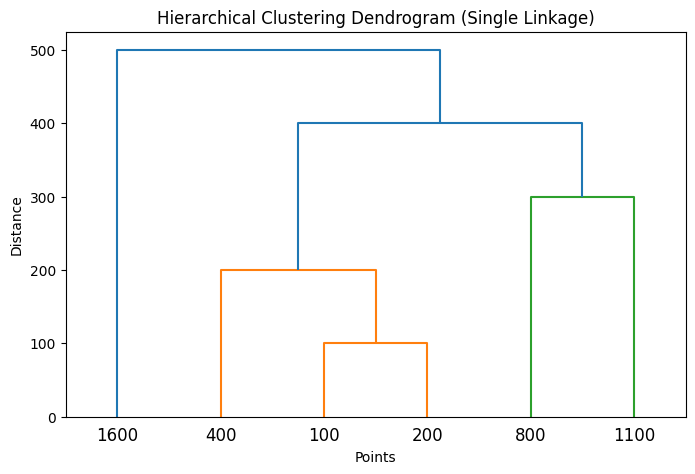

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pandas as pd

# Given points
points = np.array([100, 200, 400, 800, 1100, 1600]).reshape(-1, 1)

# Perform hierarchical clustering with single linkage (MIN)
linkage_matrix = sch.linkage(points, method='single')

# Display the merge operations and distances for each step in the linkage matrix
linkage_matrix_df = {
    'Cluster 1': linkage_matrix[:, 0].astype(int),
    'Cluster 2': linkage_matrix[:, 1].astype(int),
    'Distance': linkage_matrix[:, 2],
    'New Cluster Size': linkage_matrix[:, 3].astype(int)
}
linkage_matrix_df = pd.DataFrame(linkage_matrix_df)
print("Hierarchical Clustering Merge Operations:")
print(linkage_matrix_df)

# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(linkage_matrix, labels=points.flatten(), orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

# Graph Analytics

# Ensemble Techniques